In [ ]:
!pip install diffusers

In [ ]:
!pip install transformers

In [ ]:
!pip install accelerate

In [ ]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid

In [2]:
from diffusers import LCMScheduler, AutoPipelineForText2Image

In [ ]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16, use_safetensors=True
)
#pipeline.scheduler = LCMScheduler.from_config(pipeline.scheduler.config)
pipeline.to("cuda")


In [4]:
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png")

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2_img2img.py:276: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/30 [00:00<?, ?it/s]

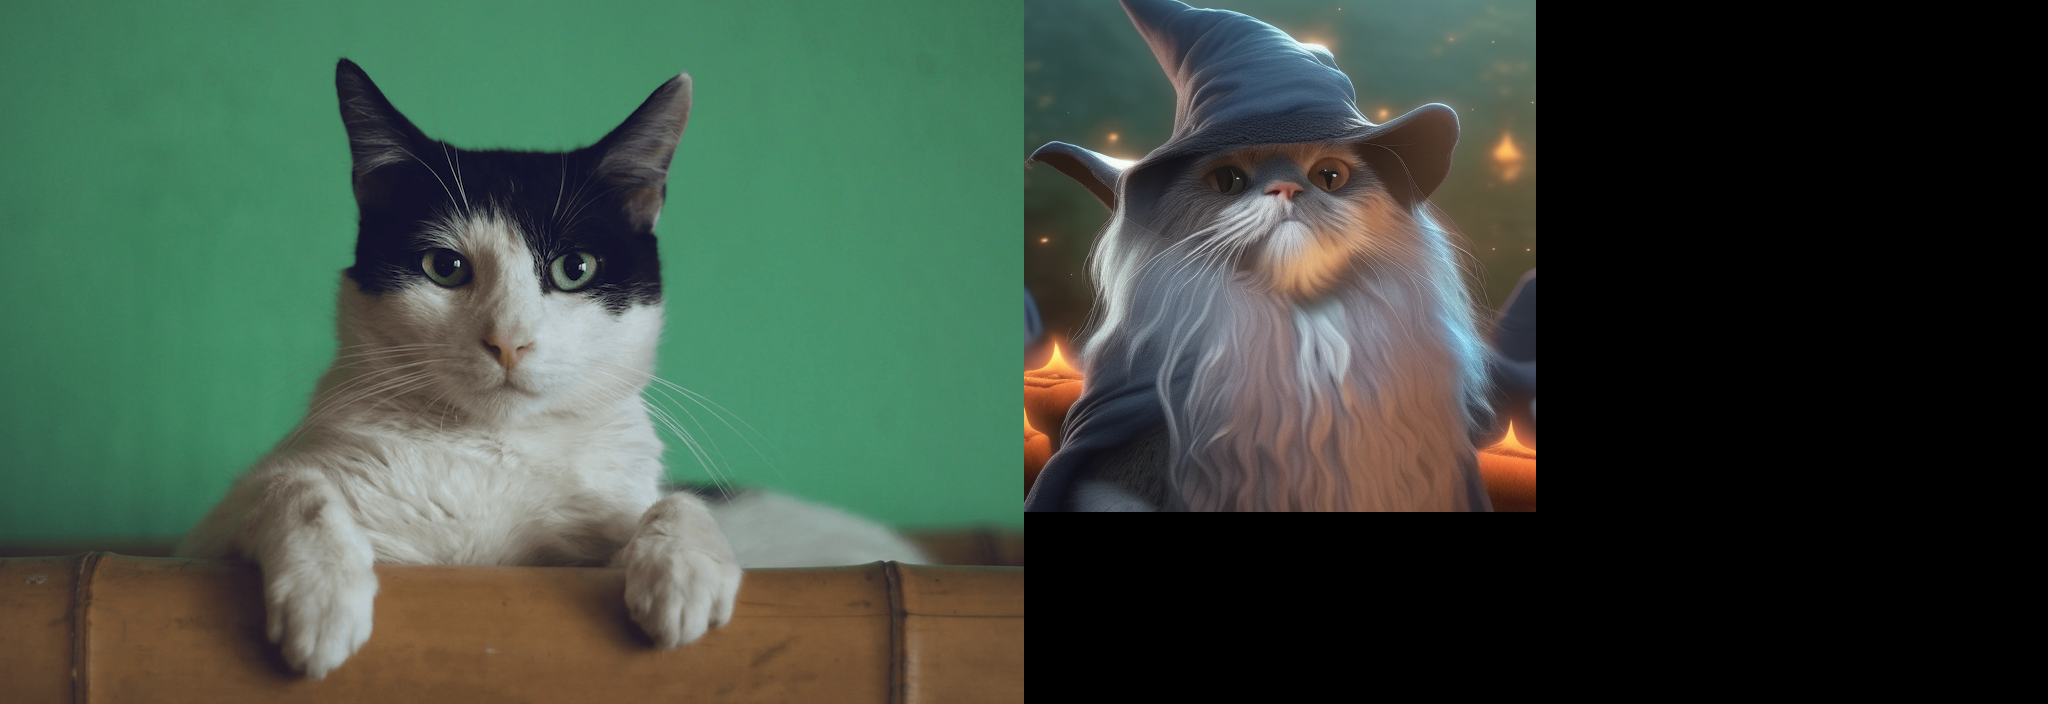

In [5]:
prompt = "cat wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"
image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

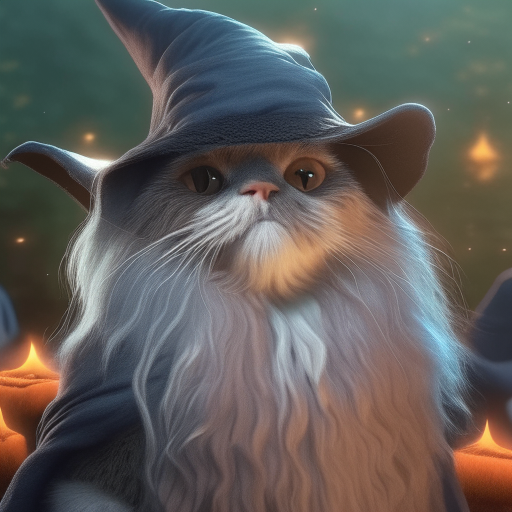

In [6]:
image

In [7]:
prompt = "cat sitting on a chair, with a cap, 8k"
image = pipeline(prompt, image=init_image).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2_img2img.py:276: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/30 [00:00<?, ?it/s]

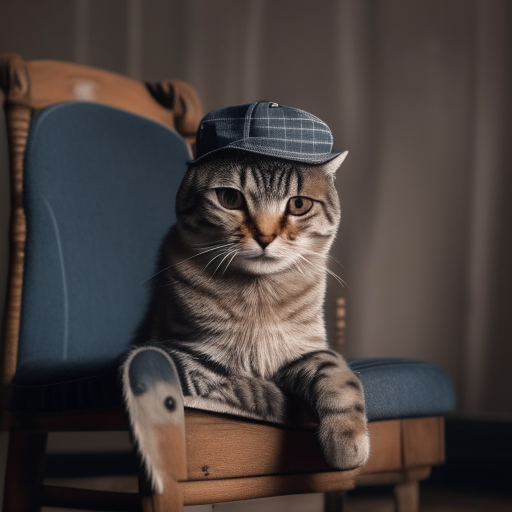

In [8]:
image

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2_img2img.py:276: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/40 [00:00<?, ?it/s]

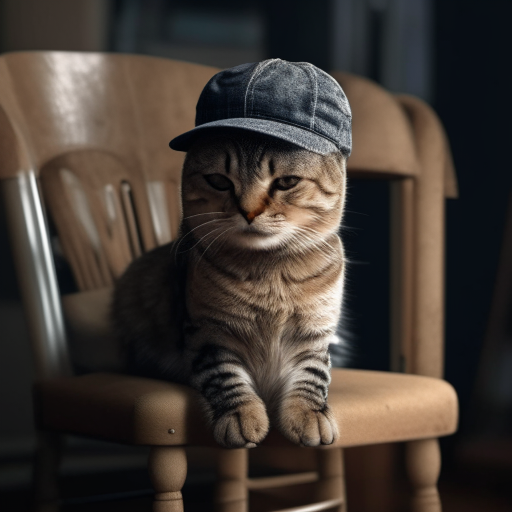

In [10]:
prompt = "cat sitting on a chair, with a cap, 8k"
image = pipeline(prompt, image=init_image,strength=0.4).images[0]
image

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2_img2img.py:276: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/80 [00:00<?, ?it/s]

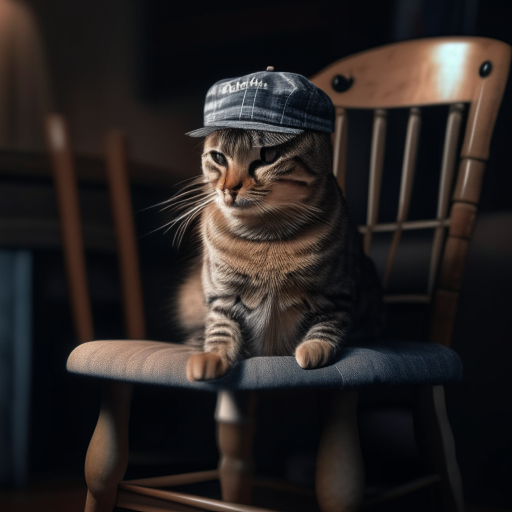

In [11]:
prompt = "cat sitting on a chair, with a cap, 8k"
image = pipeline(prompt, image=init_image,strength=0.8,guidance_scale=10.0).images[0]
image

### Explore ControlNets

In [12]:
from diffusers import ControlNetModel, AutoPipelineForImage2Image
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11f1p_sd15_depth", torch_dtype=torch.float16, variant="fp16", use_safetensors=True)

(…)1f1p_sd15_depth/resolve/main/config.json:   0%|          | 0.00/945 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/723M [00:00<?, ?B/s]

In [ ]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True,controlnet=controlnet,
)
#pipeline.scheduler = LCMScheduler.from_config(pipeline.scheduler.config)
pipeline.to("cuda")

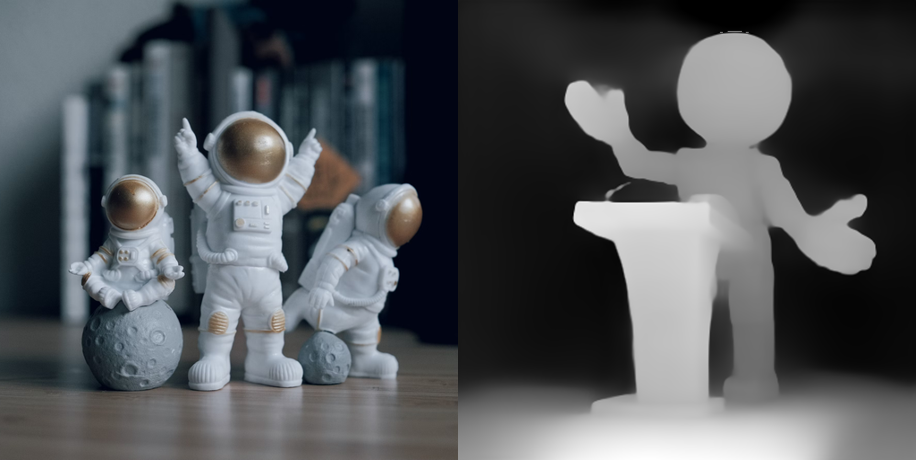

In [21]:
from diffusers.utils import load_image, make_image_grid

# prepare image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/img2img-init.png"
init_image = load_image(url)
init_image = init_image.resize((458, 460)) # resize to depth image dimensions
depth_image = load_image("https://huggingface.co/lllyasviel/control_v11f1p_sd15_depth/resolve/main/images/control.png")
depth_image = depth_image.resize((458, 460))
make_image_grid([init_image, depth_image], rows=1, cols=2)

In [18]:
import torch

# Clear cache for a specific GPU
torch.cuda.empty_cache()


  0%|          | 0/40 [00:00<?, ?it/s]

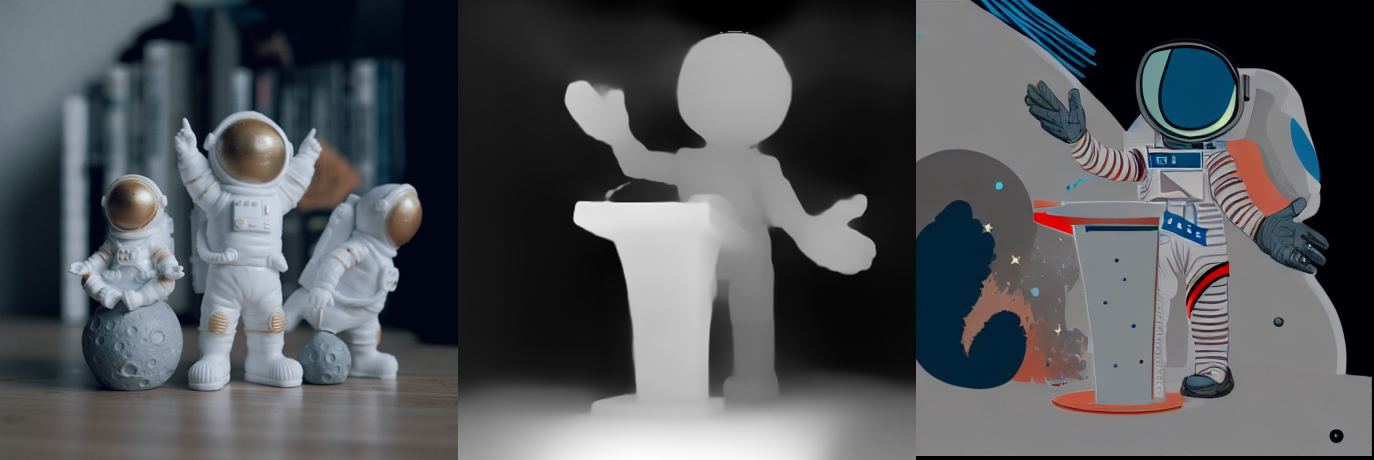

In [25]:
prompt = "Astronaut on mars, cold color palette, detailed, 8k"
image_control_net = pipeline(prompt, image=init_image, control_image=depth_image).images[0]
make_image_grid([init_image, depth_image, image_control_net], rows=1, cols=3)

  0%|          | 0/40 [00:00<?, ?it/s]

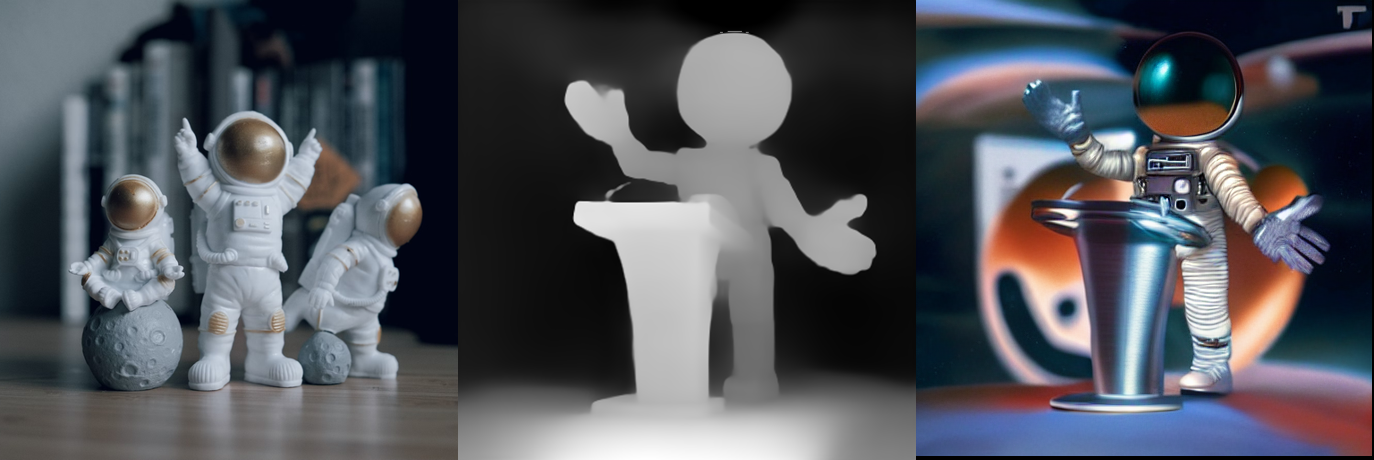

In [26]:
prompt = "Astronaut on mars, cold color palette, detailed, 8k"
negative_prompt = "ugly, deformed, disfigured, poor details, bad anatomy"
image_control_net = pipeline(prompt, image=init_image, control_image=depth_image,negative_prompt = negative_prompt).images[0]
make_image_grid([init_image, depth_image, image_control_net], rows=1, cols=3)